### Building a Neural Network from scratch 
We'll be using the MNIST dataset for this assignment. You will complete the implementation of the neural network here which will be able to recognize handwritten numbers with a pretty good accuracy.


In [1]:
# do not change the code in this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist

#### Get the data
Fetch the data from mnist<br>
Note the shape of the arrays<br>
Convert the arrays to 2-dimensional with unrolled features

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# do necessary reshaping


'\ntrain_data = pd.read_csv("mnist_datasets\\mnist_train.csv").to_numpy()\nX_train = train_data[:, 1:]\ny_train = train_data[:, 0].reshape((-1, 1))\n\ntest_data = pd.read_csv("mnist_datasets\\mnist_test.csv").to_numpy()\nX_test = test_data[:, 1:]\ny_test = test_data[:, 0].reshape((-1, 1))\n'

Run the code below to verify if you've done it right <br>
Note : if your array is a rank 1 array of shape 
(n, ) use reshape to make it 2 dimensional which will make it easier to work with since that explicitly makes it a row or column vector

In [18]:
# do not change 
print("Your output:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("\nExpected output:\n(60000, 784)\n(60000, 1)\n(10000, 784)\n(10000, 1)")

Your output:
(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)

Expected output:
(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


#### Visualize what the training examples are
you can run the following cell and change the value in range see the different training examples which are 28 * 28 pixel images

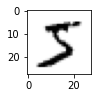

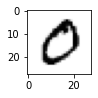

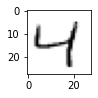

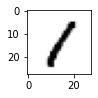

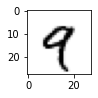

In [19]:
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i, :].reshape(28, 28), cmap=('Greys'))
    plt.show()

We shall define a neural network class which will contain the parameters and functions for training and predicting <br>
the network architecture we will consider is simple with one hidden layer <br>
Linear -> sigmoid -> linear -> sigmoid = output

In [20]:
# neural network class definition
class neuralnetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # initialie weight (random initialization) and bias matrices
        # wi => weight matrix between layers i-1 and i
        self.w1 = ?
        self.b1 = ?
        self.w2 = ?
        self.b2 = ?
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        # define this as a lambda function
        self.sigmoid = lambda x: ?
        
        pass

    
    # train the neural network - performs one step of gradient descent
    def train(self, X, y):
        """
        inputs:
            X - array of shape (number of features (=input nodes), number of examples considered)
            y - target array of shape (number of classes(=output nodes), number of examples considered)
        """
        # calculate signals into hidden layer
        Z1 = 
        # calculate the signals emerging from hidden layer (activations)
        A1 = 
        
        # calculate signals into final output layer
        Z2 = 
        # calculate the signals emerging from final output layer (activations)
        A2 = 
        
        # BACK PROPAGATION
        
        # output layer error is the (actual - target)
        dZ2 =      
        dw2 = 
        dZ1 = 
        dw1 = 
        
        # UPDATE PARAMETERS
        
        # update the weights for the links between the hidden and output layers
        self.w2 -= ?
        self.b2 -= ?
        # update the weights for the links between the input and hidden layers
        self.w1 -= ?
        self.b1 -= ?
        pass

    
    # query the neural network
    def predict(self, X):
        """
        input:
            X - array of shape (number of features (=input nodes), number of examples considered)
        output: 
            A2 - shape(number of classes, nuber of examples considered)
        
        the function simply does the forward propogate step on the input considered
        """
        ?
        
        return (A2)

In [21]:
input_nodes = 784 # 24 * 24 px images
hidden_nodes = 128 # you can change this value and see what happens
output_nodes = 10 # number of output nodes = number of classes = 10 ( 10 digits)

learning_rate = 0.1

In [22]:
# do not change
# instantiating the neural network
NN = neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

the labels you have need to be transformed into one hot encodings <br>
Create the array target of shape (output nodes, training examples) such that: <br>
- each column of targets represent the one hot encoding for a training example
- i.e: if y_train[i, 0] = 3 then targets[:, i] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].T
<br><br>
##### NOTE : 
in X_train and X_test, the features are along the rows<br>
The neural network expects the features in columns so ensure you make that change when pasing as a parameter

In [23]:
targets = ?

#### Stochastic gradient descent
you will perform a step of gradient descent for each training example
<br> <br>
Note that stochastic gradient descent is quite slow and does not converge so once you've finished, I recommend you also try to implement mini batch gradient descent

In [24]:
for i in range(X_train.shape[0]):
    ?

define an accuracy function similar to that from the previous assignment

In [25]:
def accuracy(y, y_pred):
    ?


In [26]:
?
print("accuracy on train data = ", accuracy(?))

?
print("accuracy on test data = ", accuracy(?))


accuracy on train data =  95.965
accuracy on test data =  95.53


In [29]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [30]:
#do not change
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 ) 
    
    # append label and image data  to test data set
    record = np.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  my_own_images\2828_my_own_3.png
loading ...  my_own_images\2828_my_own_4.png
loading ...  my_own_images\2828_my_own_5.png
loading ...  my_own_images\2828_my_own_7.png
loading ...  my_own_images\2828_my_own_9.png


correct label :  5.0
network says  5
match!


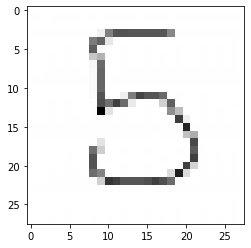

In [163]:
# test the neural network with our own images

# record to test, you can change this value
item = 2

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
print("correct label : ", correct_label)
# data is remaining values
inputs = our_own_dataset[item][1:].reshape(-1, 1)

# query the network
predictions = NN.predict(inputs)
label = np.argmax(predictions)

print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass